# Cifar-10 Object Classification

Cifar-10 dataset is a widely used image dataset for ML/DL. It contains 50000 training images of size (32,32,3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import cv2 as cv

### Import Datset
Import using pickle and save the features in lists as features and labels

In [2]:
def unpickle(file):
    with open(file, "rb") as f:
        data = pickle.load(f, encoding='bytes')
        features = data[b'data'].reshape((len(data[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
        labels = data[b'labels']
    return features, labels

In [3]:
images = []
titles = []

for i in range(1,6):
    features, labels = unpickle('cifar-10-batches-py/data_batch_' + str(i))
    
    for image in features:
        images.append(image)

    for title in labels:
        titles.append(title)

As can be seen, 50000 images in total in 5 batches

In [4]:
print(len(images))
print(len(titles))

50000
50000


The labels in the data are in numeric form from [0-9]. Map these to the original labels.

In [5]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

label_names = load_label_names()

A preview of training data can be seen below

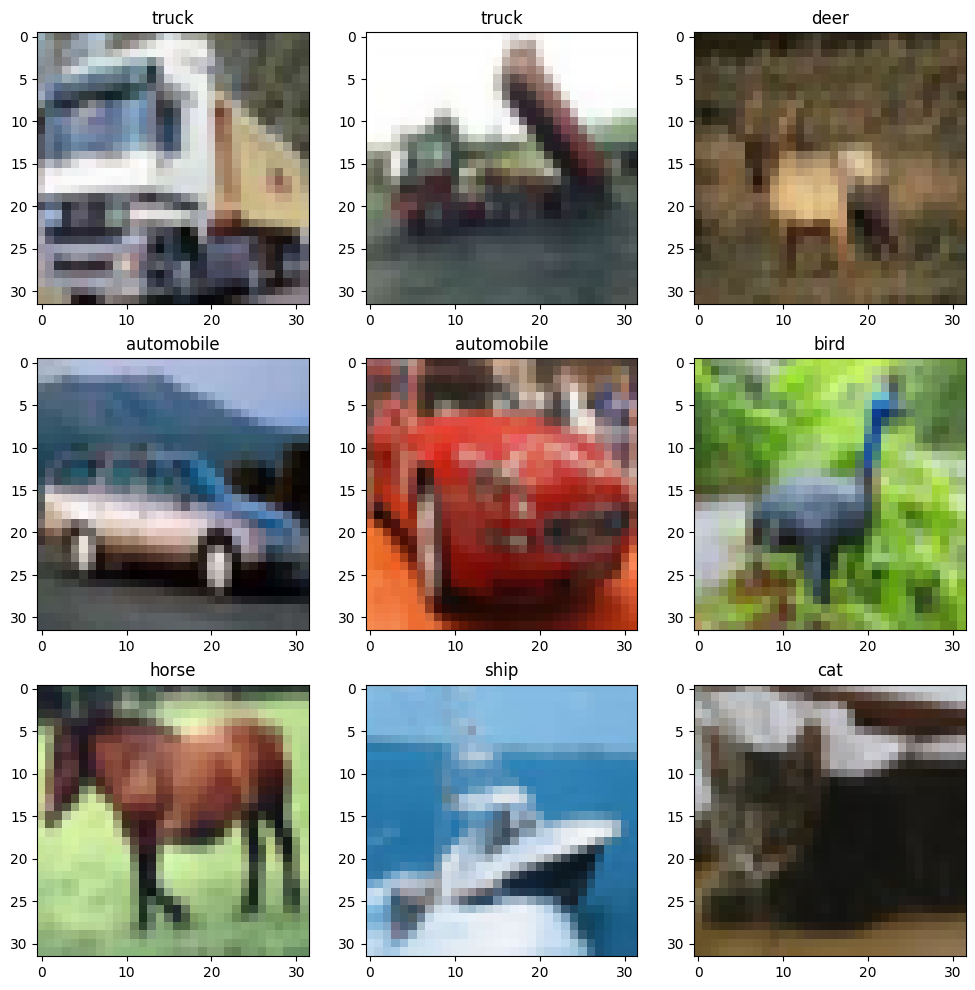

In [6]:
plt.figure(figsize=(12,12))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i])
    plt.title(label_names[titles[i]])

plt.show()

Normalize the images

In [7]:
images = np.array(images)
titles = np.array(titles)

images = images/255

# CNN (Convolutional Neural Network)

A lightweight CNN model is created for training with input shape as (32,32,3). relu activation function and softmax for multi-class classification.

In [13]:
def CNN():
    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
            tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D((2,2)),
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
            tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D((2,2)),
            tf.keras.layers.Conv2D(128, (3,3), padding='valid', activation='relu'),
            tf.keras.layers.Conv2D(128, (3,3), padding='valid', activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model

model = CNN()

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

## Split data into training and validation sets

In [21]:
from sklearn.model_selection import train_test_split

train_images, valid_images, train_labels, valid_labels = train_test_split(images, titles, test_size=0.2)

Save model weights after each epoch

In [17]:
checkpoint_filepath = 'model_weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',  # You can use other metrics like 'val_accuracy' based on your task
    mode='min',
    save_best_only=True
)

**Adam** optimizer and **Sparse_categorical_crossentropy** loss functions are used

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

The model is trained for 10 epochs

In [23]:
history = model.fit(train_images, train_labels,
                    validation_data=(valid_images, valid_labels), epochs=10, callbacks=[model_checkpoint_callback])

Epoch 1/10
1250/1250 [==============================] - 311s 249ms/step - loss: 1.6436 - accuracy: 0.3853 - val_loss: 1.3484 - val_accuracy: 0.5078
Epoch 2/10
1250/1250 [==============================] - 296s 237ms/step - loss: 1.1645 - accuracy: 0.5824 - val_loss: 1.0868 - val_accuracy: 0.6089
Epoch 3/10
1250/1250 [==============================] - 297s 238ms/step - loss: 0.9390 - accuracy: 0.6667 - val_loss: 0.9614 - val_accuracy: 0.6607
Epoch 4/10
1250/1250 [==============================] - 301s 240ms/step - loss: 0.7871 - accuracy: 0.7215 - val_loss: 0.8603 - val_accuracy: 0.6957
Epoch 5/10
1250/1250 [==============================] - 301s 241ms/step - loss: 0.6771 - accuracy: 0.7613 - val_loss: 0.8154 - val_accuracy: 0.7194
Epoch 6/10
1250/1250 [==============================] - 297s 238ms/step - loss: 0.5712 - accuracy: 0.7961 - val_loss: 0.8195 - val_accuracy: 0.7247
Epoch 7/10
1250/1250 [==============================] - 297s 238ms/step - loss: 0.4862 - accuracy: 0.8281 - val_

In [26]:
print('Accuracy:', history.history['accuracy'][-1])
print('Loss:', history.history['loss'][-1])

Accuracy: 0.903124988079071
Loss: 0.2741873264312744


Save the full model to 'final_model_weights.h5' file.

In [27]:
final_weights_filepath = 'final_model_weights.h5'       # Save model weights to a file
model.save_weights(final_weights_filepath)

Plot the Accuracy and Loss graphs to show the progress with each epoch

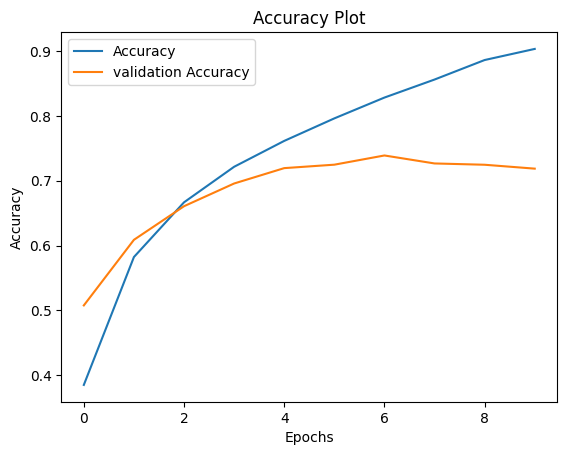

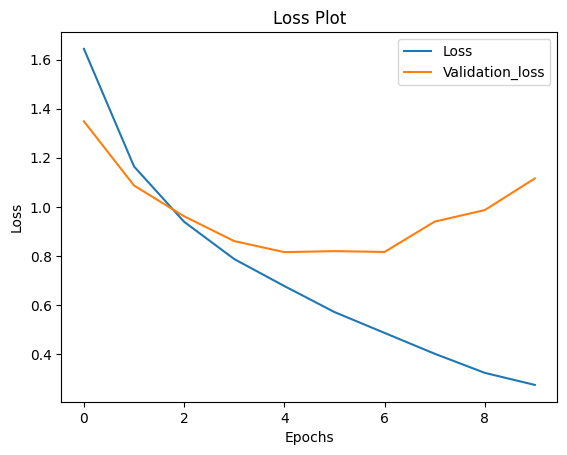

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend(['Accuracy', 'validation Accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(['Loss', 'Validation_loss'])
plt.show()

## Testing

In [31]:
test_images, test_labels = unpickle('cifar-10-batches-py/test_batch')

In [32]:
test_images, test_labels = np.array(test_images), np.array(test_labels)

test_images = test_images/255

In [33]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 20s 64ms/step - loss: 1.1571 - accuracy: 0.7143


In [35]:
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.7142999768257141
Test Loss: 1.157124638557434


## Classification Report

In [36]:
predictions = model.predict(test_images)

313/313 [==============================] - 21s 66ms/step


<Axes: >

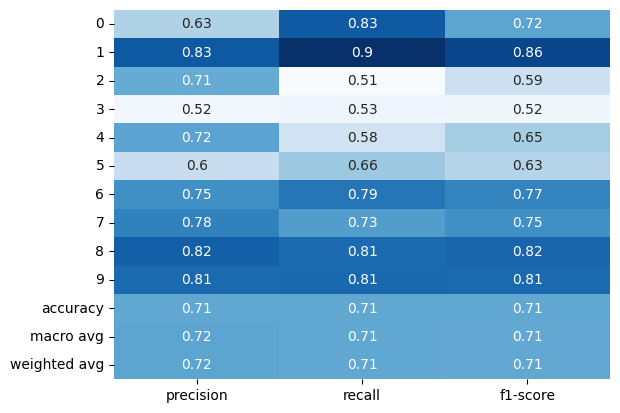

In [39]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

sns.heatmap(pd.DataFrame.from_dict(classification_report(test_labels, [np.argmax(prediction) for prediction in predictions], 
                                                         output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues', cbar=False)

### Test on your own images

In [40]:
def predict(image:list):
    preds = []
    for i in image:
        im = cv.imread(i)
        im.resize(1,32,32,3)
        pred = model.predict(im)

        preds.append(label_names[np.argmax(pred)])
    return preds

In [41]:
predict(['Car.jpg'])

1/1 [==============================] - 0s 150ms/step


['automobile']